In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
%matplotlib inline

In [18]:
# Load the scraped dataset
df = pd.read_csv('buy_rent_kenya.csv')

In [20]:
df.head(10)

,Title,Location,No of Bedrooms,No of Bathrooms,Description,Price
0,3 Bed House with En Suite at Karen,"karen, Karen",3,3.0,Beautiful modern three bedroom house,"KSh 200,000/ month"
1,5 Bed House with En Suite at Garden Estate,"Garden estate, Garden Estate, Roysambu",5,6.0,4bedroom +Dsq & outside kitchen,"KSh 300,000/ month"
2,5 Bed House with En Suite at Wangige,"Kibichiku, Wangige, Kitisuru, Westlands",5,NaN,Serene 5 bedroom furnished house to let,"KSh 200,000/ month"
3,2 Bed House with En Suite in Runda,"Runda, Westlands",2,2.0,Charming furnished 2-Bedroom Cottage for Rent ...,"KSh 130,000/ month"
4,10 Bed House with En Suite at Runda,"02, Runda, Westlands",10,10.0,Luxurious 12-Bedroom House for Rent in Runda,"KSh 1,290,000/ month"
5,5 Bed House with En Suite in Lavington,Lavington,5,5.0,"Exceptional 5-bedroom ensuite villa, epitomizi...","KSh 350,000/ month"
6,4 Bed House with En Suite in Spring Valley,"Spring Valley, Westlands",4,4.0,4-Bedroom Unfurnished Cottage for Rent – Sprin...,"KSh 230,000/ month"
7,4 Bed House with En Suite in Lavington,Lavington,4,4.0,🏡 Experience a Home That Redefines Comfort and...,"KSh 270,000/ month"
8,4 Bed Villa with En Suite at Lavington,"lavington, Lavington",4,5.0,Delightful Home! Lavington Four Bedroom Townho...,"KSh 350,000/ month"
9,5 Bed House with En Suite in Kitisuru,"Kitisuru, Westlands",5,5.0,🏡 Luxurious Five-Bedroom House for Rent in Kit...,"KSh 450,000/ month"


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1509 entries, 0 to 1508
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Title            1509 non-null   object 
 1   Location         1509 non-null   object 
 2   No of Bedrooms   1509 non-null   int64  
 3   No of Bathrooms  1442 non-null   float64
 4   Description      1509 non-null   object 
 5   Price            1509 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 70.9+ KB


In [24]:
df.describe()

,No of Bedrooms,No of Bathrooms
count,1509.000000,1442.000000
mean,4.222001,4.400832
std,1.046856,1.265657
min,1.000000,1.000000
25%,4.000000,4.000000
50%,4.000000,5.000000
75%,5.000000,5.000000
max,10.000000,10.000000


In [26]:
# Function to clean price column
def clean_price(price):
    if isinstance(price, str):
        price = re.sub(r'[^\d]', '', price)  # Remove non-numeric characters
        return int(price) if price else None
    return None

In [28]:
# Clean 'Price' column
df['Price'] = df['Price'].apply(clean_price)

In [30]:
# Function to extract numeric values from bedroom/bathroom columns
def extract_number(text):
    if isinstance(text, str):
        match = re.search(r'\d+', text)  # Extract first number found
        return int(match.group()) if match else None
    return None

In [32]:
# Clean 'No of Bedrooms' and 'No of Bathrooms' columns
df['No of Bedrooms'] = df['No of Bedrooms'].apply(extract_number)
df['No of Bathrooms'] = df['No of Bathrooms'].apply(extract_number)

In [34]:
# Fill missing values
df.fillna({'Price': df['Price'].median(), 'No of Bedrooms': 0, 'No of Bathrooms': 0}, inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_9704\3329557167.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.fillna({'Price': df['Price'].median(), 'No of Bedrooms': 0, 'No of Bathrooms': 0}, inplace=True)


In [36]:
# Standardize location names (optional, based on patterns in your data)
df['Location'] = df['Location'].str.title()  # Capitalize each word

In [38]:
# Save the cleaned dataset
df.to_csv('cleaned_rental_data.csv', index=False)

In [40]:
print("Data cleaning complete! Cleaned dataset saved as 'cleaned_rental_data.csv'.")
print(df.head())

Data cleaning complete! Cleaned dataset saved as 'cleaned_rental_data.csv'.
                                        Title  \
0          3 Bed House with En Suite at Karen   
1  5 Bed House with En Suite at Garden Estate   
2        5 Bed House with En Suite at Wangige   
3          2 Bed House with En Suite in Runda   
4         10 Bed House with En Suite at Runda   

                                  Location  No of Bedrooms  No of Bathrooms  \
0                             Karen, Karen               0                0   
1   Garden Estate, Garden Estate, Roysambu               0                0   
2  Kibichiku, Wangige, Kitisuru, Westlands               0                0   
3                         Runda, Westlands               0                0   
4                     02, Runda, Westlands               0                0   

                                         Description      Price  
0               Beautiful modern three bedroom house   200000.0  
1                    4

In [42]:
#download the cleaned data set
from IPython.display import FileLink
FileLink('cleaned_rental_data.csv')

C:\Users\DELL\cleaned_rental_data.csv

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
# Load the cleaned dataset
df = pd.read_csv('cleaned_rental_data.csv')

In [48]:
# Set plot style
sns.set(style="whitegrid")


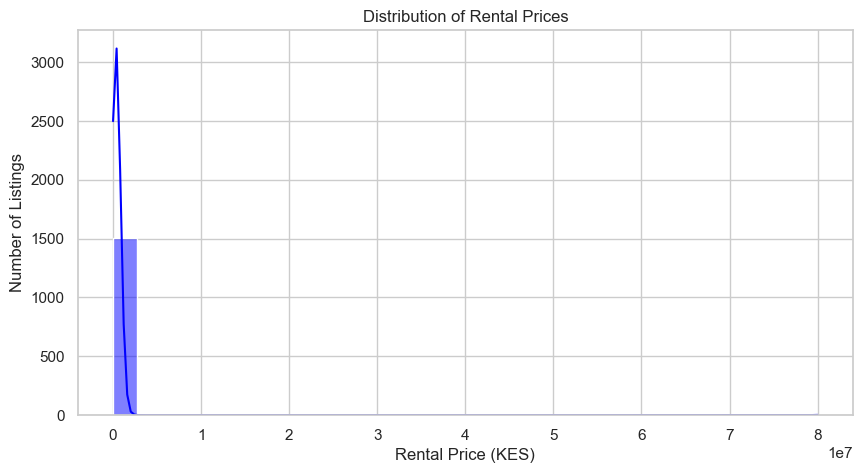

In [50]:
# 1️⃣ Price Distribution
plt.figure(figsize=(10, 5))
sns.histplot(df['Price'], bins=30, kde=True, color='blue')
plt.xlabel("Rental Price (KES)")
plt.ylabel("Number of Listings")
plt.title("Distribution of Rental Prices")
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_9704\1191980668.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price_per_bedroom.index, y=avg_price_per_bedroom.values, palette="coolwarm")


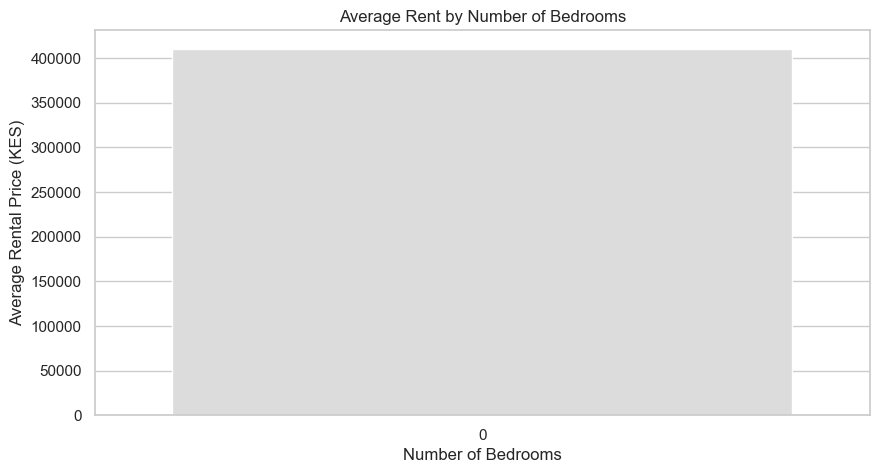

In [52]:
# 2️⃣ Average Rent by Number of Bedrooms
plt.figure(figsize=(10, 5))
avg_price_per_bedroom = df.groupby("No of Bedrooms")["Price"].mean().sort_index()
sns.barplot(x=avg_price_per_bedroom.index, y=avg_price_per_bedroom.values, palette="coolwarm")
plt.xlabel("Number of Bedrooms")
plt.ylabel("Average Rental Price (KES)")
plt.title("Average Rent by Number of Bedrooms")
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_9704\2035747793.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_expensive.values, y=top_10_expensive.index, palette="Reds_r", ax=axes[0])
C:\Users\DELL\AppData\Local\Temp\ipykernel_9704\2035747793.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_cheap.values, y=top_10_cheap.index, palette="Greens", ax=axes[1])


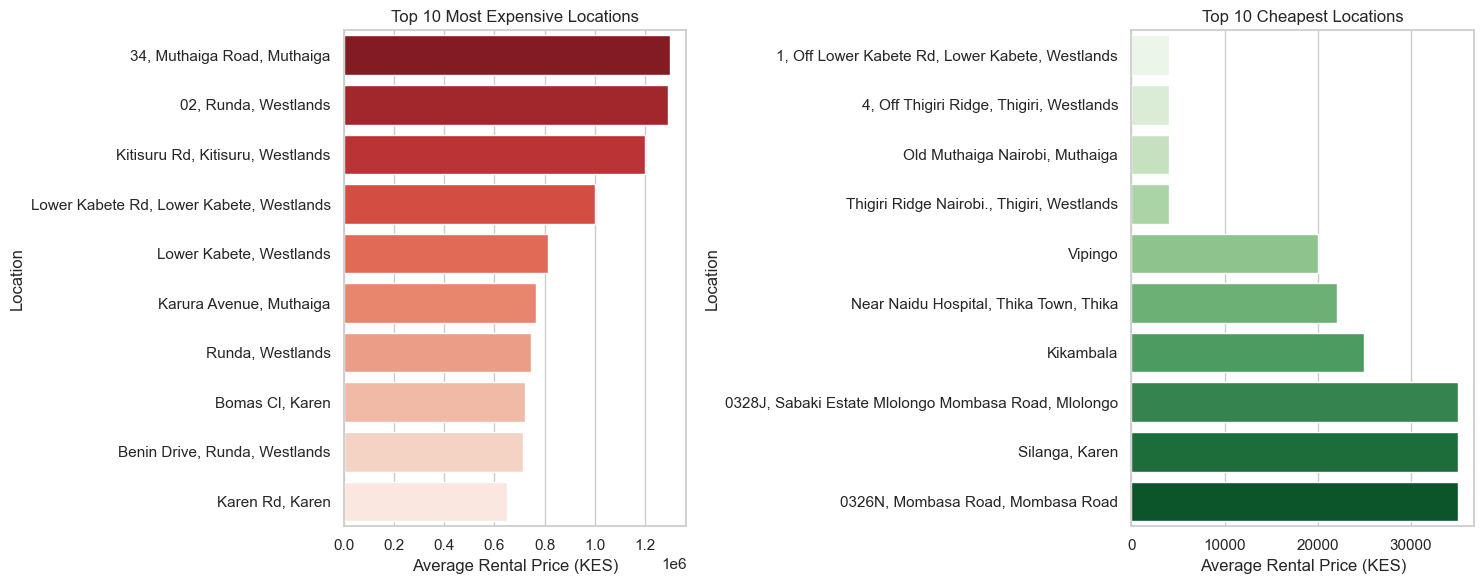

In [54]:
# 3️⃣ Top 10 Most Expensive & Cheapest Locations
top_10_expensive = df.groupby("Location")["Price"].mean().sort_values(ascending=False).head(10)
top_10_cheap = df.groupby("Location")["Price"].mean().sort_values(ascending=True).head(10)

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

sns.barplot(x=top_10_expensive.values, y=top_10_expensive.index, palette="Reds_r", ax=axes[0])
axes[0].set_title("Top 10 Most Expensive Locations")
axes[0].set_xlabel("Average Rental Price (KES)")

sns.barplot(x=top_10_cheap.values, y=top_10_cheap.index, palette="Greens", ax=axes[1])
axes[1].set_title("Top 10 Cheapest Locations")
axes[1].set_xlabel("Average Rental Price (KES)")

plt.tight_layout()
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_9704\3093853705.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Location", y="Price", data=df_filtered, palette="Set2")


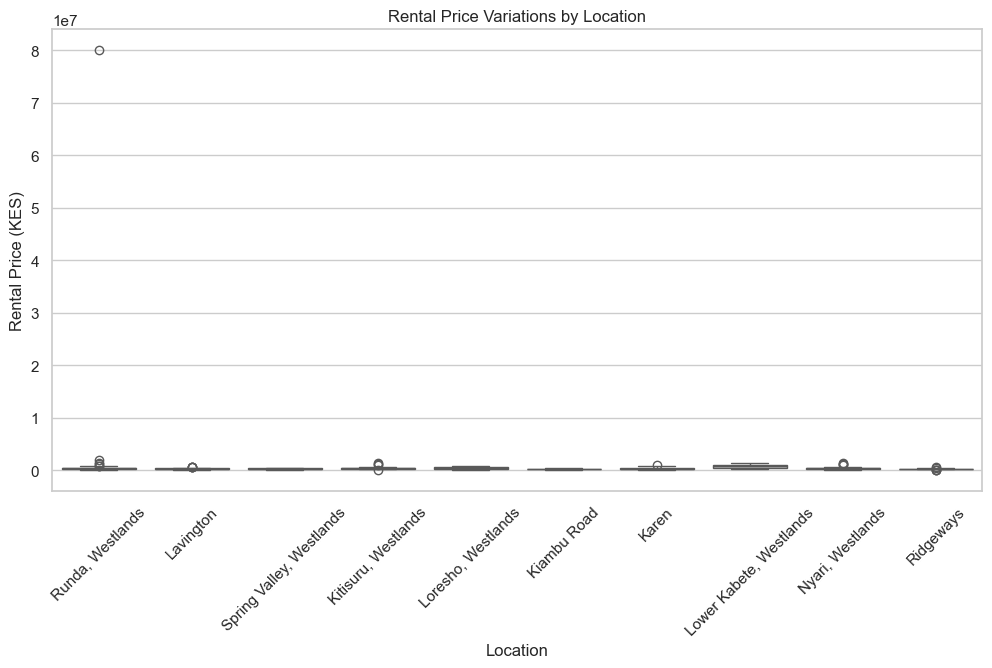

In [56]:
# 4️⃣ Price Trends by Location (Box Plot)
plt.figure(figsize=(12, 6))
top_locations = df['Location'].value_counts().head(10).index  # Top 10 most frequent locations
df_filtered = df[df['Location'].isin(top_locations)]
sns.boxplot(x="Location", y="Price", data=df_filtered, palette="Set2")
plt.xticks(rotation=45)
plt.xlabel("Location")
plt.ylabel("Rental Price (KES)")
plt.title("Rental Price Variations by Location")
plt.show()